In [35]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.nn.conv.gcn_conv import gcn_norm


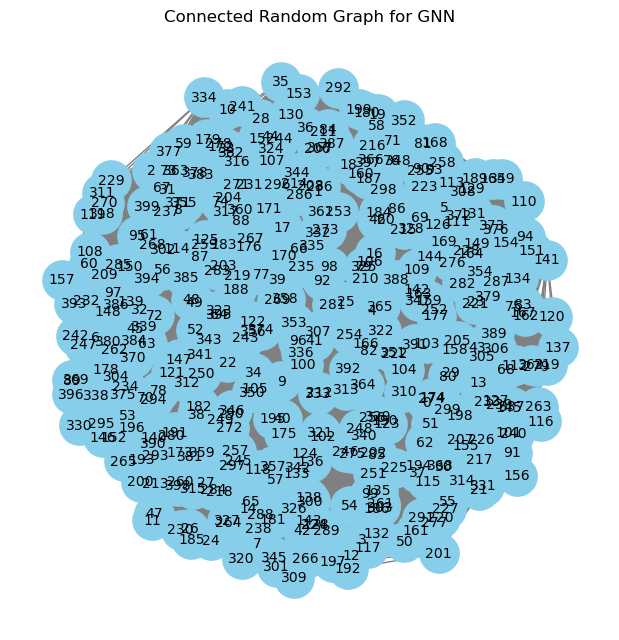

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

n = 400
p = 0.3  
while True:
    G = nx.erdos_renyi_graph(n, p)
    if nx.is_connected(G):
        break  
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800, font_size=10)
plt.title("Connected Random Graph for GNN")
plt.show()


STC Centrality :  {0: 133581.25, 1: 139958.5, 2: 134276.375, 3: 138606.875, 4: 142301.75, 5: 134897.75, 6: 137766.25, 7: 135087.75, 8: 137800.875, 9: 138793.375, 10: 135608.75, 11: 134996.375, 12: 136112.625, 13: 136371.125, 14: 141347.25, 15: 137941.125, 16: 136334.75, 17: 142345.5, 18: 138668.125, 19: 135219.25, 20: 144512.375, 21: 138205.75, 22: 141587.375, 23: 131657.125, 24: 134490.5, 25: 141613.25, 26: 135350.875, 27: 137436.5, 28: 134919.0, 29: 134819.125, 30: 133747.375, 31: 136834.625, 32: 135032.125, 33: 136880.125, 34: 140338.0, 35: 133614.375, 36: 138914.375, 37: 137445.25, 38: 136057.875, 39: 137617.75, 40: 136638.25, 41: 141584.5, 42: 136858.125, 43: 137736.0, 44: 136750.375, 45: 134002.25, 46: 134887.625, 47: 135012.625, 48: 142788.125, 49: 140605.625, 50: 133830.125, 51: 134223.625, 52: 137600.75, 53: 140930.25, 54: 138823.5, 55: 140058.125, 56: 141610.875, 57: 136147.125, 58: 135413.0, 59: 137307.0, 60: 135845.125, 61: 137446.0, 62: 137062.875, 63: 136622.75, 64: 14185

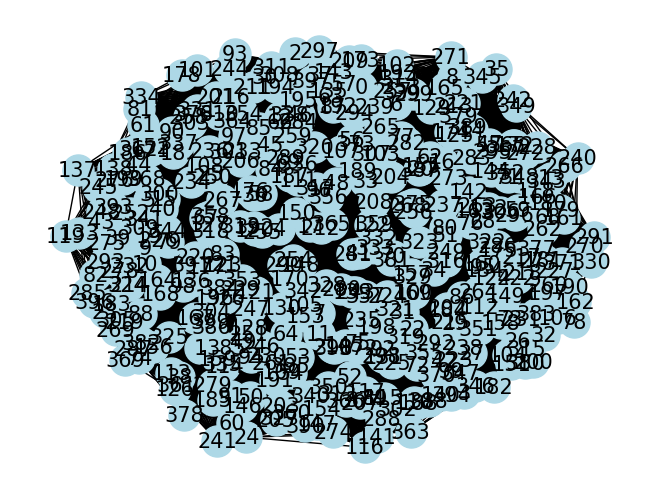

In [43]:
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt

def bfs_upto_level(graph, start_node, max_level):
    visited = set()
    result = []
    queue = deque([(start_node, 0)])
    
    while queue:
        node, level = queue.popleft()
        
        if level > max_level:
            break
        
        if node not in visited:
            visited.add(node)
            result.append((node, level))
            
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    queue.append((neighbor, level + 1))
    
    return result

def total_triangles_in_bfs(graph, start_node, max_level):
    nodes_in_bfs = bfs_upto_level(graph, start_node, max_level)
    # print(start_node+' has nodes : ',nodes_in_bfs)
    triangles = nx.triangles(graph)  
    total = 0
    
    for node, level in nodes_in_bfs:
        total += triangles[node] / pow(2, level+1) 
    
    return total

def stcCentrality(graph):
    centrality = {}
    for node in graph.nodes():
        centrality[node] = total_triangles_in_bfs(graph, node, 3)  
    return centrality

Gr =G.copy() 

ans=stcCentrality(Gr);
print('STC Centrality : ',ans)

ranked_nodes = sorted(ans.items(), key=lambda x: x[1], reverse=True)

rankings = {}
rank = 1
prev_centrality = None

for node, centrality in ranked_nodes:
    if prev_centrality is not None and centrality != prev_centrality:
        rank += 1
    
    rankings[node] = rank  
    prev_centrality = centrality

# Print the rankings
print("Nodes ranked by STC Centrality:")
print(rankings)

y_true = [0] * len(rankings)

# Assign rankings based on node index
for node, rank in rankings.items():
    y_true[node] = rank

print(y_true)

nx.draw(Gr, with_labels=True, node_color='lightblue', node_size=500, font_size=15)
plt.show()

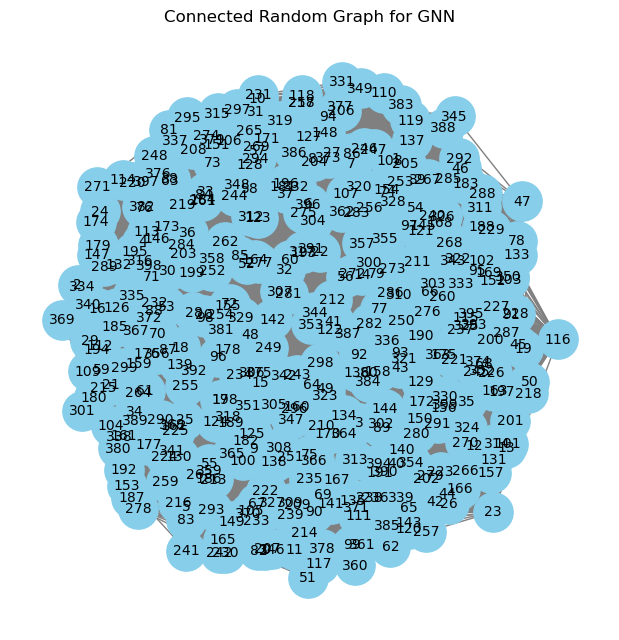

In [44]:
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800, font_size=10)
plt.title("Connected Random Graph for GNN")
plt.show()

In [47]:
adj = nx.to_numpy_array(G, dtype=int)

triangle_counts = nx.triangles(G)
degrees = dict(G.degree()) 

x = np.array([[triangle_counts[node], degrees[node]] for node in G.nodes()])

print("Adjacency Matrix (adj):")
print(adj)

print("\nFeature Matrix (x) [count_of_triangle, degree]:")
print(x)

Adjacency Matrix (adj):
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 1]
 [0 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]]

Feature Matrix (x) [count_of_triangle, degree]:
[[1591  105]
 [2417  127]
 [1659  105]
 [2264  124]
 [2666  134]
 [1735  109]
 [2083  117]
 [1782  111]
 [2183  121]
 [2198  122]
 [1896  113]
 [1810  111]
 [1938  116]
 [1926  115]
 [2525  129]
 [2126  121]
 [1965  115]
 [2690  136]
 [2262  123]
 [1784  108]
 [3075  144]
 [2133  118]
 [2611  135]
 [1445  100]
 [1705  108]
 [2628  133]
 [1900  115]
 [2072  120]
 [1774  110]
 [1793  110]
 [1634  105]
 [2017  118]
 [1760  110]
 [2021  118]
 [2369  125]
 [1628  104]
 [2256  124]
 [2081  118]
 [1881  114]
 [2107  120]
 [1937  118]
 [2619  132]
 [1984  116]
 [2086  119]
 [2005  117]
 [1689  108]
 [1762  109]
 [1807  110]
 [2738  137]
 [2438  128]
 [1644  107]
 [1714  107]
 [2071  120]
 [2549  131]
 [2275  124]
 [2453  126]
 [2618  133]
 [1925  114]
 [1875  114]
 [2114  120]
 [1909  113]
 [2126  121]
 

In [49]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

print(x)

[[0.15831135 0.18867925]
 [0.59419525 0.60377358]
 [0.19419525 0.18867925]
 [0.51345646 0.54716981]
 [0.72559367 0.73584906]
 [0.23430079 0.26415094]
 [0.41794195 0.41509434]
 [0.2591029  0.30188679]
 [0.4707124  0.49056604]
 [0.47862797 0.50943396]
 [0.31926121 0.33962264]
 [0.27387863 0.30188679]
 [0.3414248  0.39622642]
 [0.33509235 0.37735849]
 [0.65118734 0.64150943]
 [0.44063325 0.49056604]
 [0.35567282 0.37735849]
 [0.73825858 0.77358491]
 [0.51240106 0.52830189]
 [0.26015831 0.24528302]
 [0.9414248  0.9245283 ]
 [0.44432718 0.43396226]
 [0.69656992 0.75471698]
 [0.08126649 0.09433962]
 [0.21846966 0.24528302]
 [0.7055409  0.71698113]
 [0.32137203 0.37735849]
 [0.4121372  0.47169811]
 [0.25488127 0.28301887]
 [0.26490765 0.28301887]
 [0.18100264 0.18867925]
 [0.38311346 0.43396226]
 [0.2474934  0.28301887]
 [0.38522427 0.43396226]
 [0.56886544 0.56603774]
 [0.17783641 0.16981132]
 [0.50923483 0.54716981]
 [0.41688654 0.43396226]
 [0.31134565 0.35849057]
 [0.43060686 0.47169811]


In [18]:
print(x)

[[0.35678392 0.48      ]
 [0.32160804 0.4       ]
 [0.20100503 0.28      ]
 [0.23115578 0.4       ]
 [0.20100503 0.28      ]
 [0.2361809  0.36      ]
 [0.35175879 0.48      ]
 [0.12060302 0.32      ]
 [0.49748744 0.6       ]
 [0.33668342 0.44      ]
 [0.49246231 0.6       ]
 [0.30150754 0.36      ]
 [0.38693467 0.52      ]
 [0.35175879 0.52      ]
 [0.28140704 0.44      ]
 [0.26130653 0.4       ]
 [0.38190955 0.48      ]
 [0.21105528 0.32      ]
 [0.29648241 0.36      ]
 [0.62311558 0.68      ]
 [0.18592965 0.4       ]
 [0.61809045 0.68      ]
 [0.4321608  0.56      ]
 [0.46231156 0.56      ]
 [0.66834171 0.72      ]
 [0.73366834 0.76      ]
 [0.5678392  0.68      ]
 [0.22613065 0.4       ]
 [0.33668342 0.4       ]
 [0.32160804 0.44      ]
 [0.54271357 0.64      ]
 [0.22110553 0.36      ]
 [0.11557789 0.2       ]
 [0.35175879 0.48      ]
 [0.47738693 0.64      ]
 [0.57286432 0.64      ]
 [0.38190955 0.44      ]
 [0.41708543 0.48      ]
 [0.30150754 0.48      ]
 [0.00502513 0.16      ]


In [51]:
edge_index = torch.tensor(np.array(np.nonzero(adj)), dtype=torch.long)
print(type(edge_index)) 

<class 'torch.Tensor'>


In [53]:
# y_true=y_true.tensor(x, dtype=torch.float32)
max_value = np.max(y_true)
max_value

397

In [55]:
y_true = torch.tensor(y_true, dtype=torch.float32)  # Correct way

In [57]:
x = torch.tensor(x, dtype=torch.float32)


In [59]:
# print(type(edge_index))
# print(type(x))
# print(type(y_true))
y_true

tensor([368.,  77., 347., 137.,  18., 330., 184., 317., 182., 124., 297., 326.,
        271., 260.,  40., 170., 263.,  17., 133., 312.,   3., 150.,  33., 395.,
        340.,  31., 309., 210., 329., 334., 362., 241., 321., 239.,  67., 365.,
        115., 208., 276., 196., 252.,  34., 240., 189., 247., 356., 332., 323.,
         13.,  58., 359., 349., 197.,  47., 121.,  75.,  32., 269., 307., 215.,
        288., 207., 227., 253.,  26.,  97.,  72., 122., 255.,  56.,  35., 213.,
        125., 201.,  81., 232., 286.,  25., 236.,  66.,  57., 310., 305., 378.,
        111., 103.,  98., 143., 192., 209., 341., 279.,  50., 386., 314., 202.,
         20., 244.,   9., 136., 100., 385., 123., 183., 270.,  49., 366.,  59.,
        242., 190., 393.,  54., 211.,  88., 204., 308., 390., 176., 302., 380.,
        353., 174.,  10., 266.,  41.,  80., 130., 311., 169., 245., 129., 277.,
        191., 300., 114., 290.,  63., 384., 127., 132., 205., 394.,  30., 166.,
        333., 237., 273., 156.,  51., 10

In [65]:
import torch
import torch.nn as nn  
import torch.optim as optim
from torch_geometric.nn import GCNConv
import torch_geometric.utils as utils
import networkx as nx
import numpy as np

# Define the GCN model
class GCN(nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn1 = GCNConv(2, 3)  
        self.gcn2 = GCNConv(3, 4) 
        self.out = nn.Linear(4, max_value+1)  # Adjusted input size

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index).relu()
        h = self.gcn2(h, edge_index).relu()  # Added GCN layer
        z = self.out(h)
        return h, z


# Initialize model, loss, and optimizer
model = GCN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.02)

# Accuracy function
def accuracy(pred_y, y):
    return (pred_y == y).sum().item() / len(y)

# Training loop
outputs = []
for epoch in range(5000):
    optimizer.zero_grad()
    h, z = model(x, edge_index) 
    loss = criterion(z, y_true)
    acc = accuracy(z.argmax(dim=1), y_true)
    loss.backward()
    optimizer.step()
    outputs.append(z.argmax(dim=1))
    
    if epoch % 100 == 0:
        
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')
print(outputs[-1])


Epoch   0 | Loss: 6.03 | Acc: 0.25%
Epoch 100 | Loss: 5.87 | Acc: 0.50%
Epoch 200 | Loss: 5.53 | Acc: 1.00%
Epoch 300 | Loss: 5.33 | Acc: 1.75%
Epoch 400 | Loss: 5.19 | Acc: 1.50%
Epoch 500 | Loss: 5.08 | Acc: 1.25%
Epoch 600 | Loss: 5.00 | Acc: 2.00%
Epoch 700 | Loss: 4.93 | Acc: 1.50%
Epoch 800 | Loss: 4.87 | Acc: 3.00%
Epoch 900 | Loss: 4.84 | Acc: 1.50%
Epoch 1000 | Loss: 4.77 | Acc: 2.00%
Epoch 1100 | Loss: 4.72 | Acc: 1.25%
Epoch 1200 | Loss: 4.68 | Acc: 4.25%
Epoch 1300 | Loss: 4.65 | Acc: 3.00%
Epoch 1400 | Loss: 4.61 | Acc: 3.75%
Epoch 1500 | Loss: 4.58 | Acc: 3.75%
Epoch 1600 | Loss: 4.55 | Acc: 6.75%
Epoch 1700 | Loss: 4.53 | Acc: 3.75%
Epoch 1800 | Loss: 4.50 | Acc: 4.25%
Epoch 1900 | Loss: 4.48 | Acc: 4.50%
Epoch 2000 | Loss: 4.46 | Acc: 5.25%
Epoch 2100 | Loss: 4.43 | Acc: 5.25%
Epoch 2200 | Loss: 4.41 | Acc: 5.50%
Epoch 2300 | Loss: 4.40 | Acc: 4.25%
Epoch 2400 | Loss: 4.37 | Acc: 5.50%
Epoch 2500 | Loss: 4.36 | Acc: 5.50%
Epoch 2600 | Loss: 4.36 | Acc: 2.00%
Epoch 2700 

In [63]:
y_true = torch.tensor(y_true, dtype=torch.long)  # Ensure it is Long


/var/folders/y_/bgxf88653s949l9fz6nwpb7r0000gn/T/ipykernel_1121/4182472102.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true, dtype=torch.long)  # Ensure it is Long
